<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Teoría de Redes Neuronales Recurrentes


## Introducción


Los humanos no comienzan su pensamiento desde cero cada segundo. A medida que vamos leyendo, comprendemos cada palabra en función de su comprensión de las palabras anteriores. No tiras todo y empiezas a pensar desde cero otra vez. Tus pensamientos tienen persistencia.

Las redes neuronales tradicionales no pueden hacer esto y parece que esto es una gran deficiencia. Por ejemplo, imaginemos que se desea clasificar qué tipo de evento está sucediendo en escena de una película. No está claro cómo una red neuronal tradicional podría usar su razonamiento sobre eventos anteriores en la película para informar los posteriores.

Las redes neuronales recurrentes abordan este problema. Son redes con bucles en ellas, lo que permite que la información persista.


<img src="Figures/RNN-rolled.png" alt="Grayscale Image" width="100">


En el diagrama anterior, una parte de la red neuronal, $A$, analiza alguna entrada $x_t$ y genera un valor $h_t$. Un bucle permite que la información pase de un paso de la red al siguiente.

Estos bucles hacen que las redes neuronales recurrentes parezcan algo misteriosas. Sin embargo, si pensamos un poco más, resulta que no son tan diferentes de una red neuronal normal. Se puede pensar en una red neuronal recurrente como múltiples copias de la misma red, cada una de las cuales pasa un mensaje a un sucesor. Consideremos lo que sucede si desenrollamos el ciclo:

<img src="Figures/RNN-unrolled.png" alt="Grayscale Image" width="500">

Esta naturaleza revela que las redes neuronales recurrentes están íntimamente relacionadas con secuencias y listas. Son la arquitectura natural de la red neuronal para usar para tales datos.

¡Y ciertamente se usan! En los últimos años, ha habido un éxito increíble al aplicar RNN a una variedad de problemas: -  

- reconocimiento de voz
- modelado de lenguaje
- traducción
- subtítulos de imágenes... etc... 

Las "LSTM" son un tipo muy especial de red neuronal recurrente, que se aplica a muchas tareas, mucho mejor que la versión estándar. Casi todos los resultados emocionantes basados en redes neuronales recurrentes se logran con las LSTM. 

## El problema de las dependencias a largo plazo

Uno de los atractivos de las RNN es la idea de que podrían conectar información previa con la tarea actual. Si las RNN pudieran hacer esto, serían extremadamente útiles. Pero pueden? Eso depende.

A veces, solo necesitamos mirar información reciente para realizar la tarea actual. Por ejemplo, si consideramos un modelo de lenguaje natural que intente predecir la siguiente palabra en función de las anteriores de un texto, entonces estaríamos tratando de predecir la última palabra del texto (Ej. "las nubes están en el"), no necesitaríamos más contexto: es bastante obvio que la siguiente palabra sería cielo. En tales casos, donde la brecha entre la información relevante y el lugar donde se necesita es pequeña, los RNN pueden aprender a usar la información pasada.

<img src="Figures/RNN-shorttermdepdencies.png" alt="Grayscale Image" width="300">

Pero también hay casos en los que necesitamos más contexto. Considere tratar de predecir la última palabra en el texto "Crecí en Francia... hablo fluidamente francés". Información reciente sugiere que la siguiente palabra probablemente sea el nombre de un idioma, pero si queremos acotar qué idioma, necesitamos el contexto de Francia, desde más atrás. Es completamente posible que la brecha entre la información relevante y el punto donde se necesita se vuelva muy grande.

Desafortunadamente, a medida que crece esa brecha, los RNN se vuelven incapaces de aprender a conectar la información.

<img src="Figures/RNN-longtermdependencies.png" alt="Grayscale Image" width="400">

En teoría, los RNN son absolutamente capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, los RNN parecen no poder aprenderlos. El problema fue explorado en profundidad por Hochreiter (1991) y Bengio, et al. (1994), quiénes encontraron algunas razones bastante fundamentales por las que podría ser difícil.

¡Afortunadamente, los LSTM no tienen este problema!

## Redes LSTM 

Las redes de memoria a largo plazo, generalmente llamadas simplemente "LSTM", son un tipo especial de RNN, capaces de aprender dependencias a largo plazo. Fueron introducidos por Hochreiter & Schmidhuber (1997), y muchas personas los refinaron y popularizaron en trabajos posteriores. Funcionan tremendamente bien en una gran variedad de problemas y ahora se usan ampliamente.

Los LSTM están diseñados explícitamente para evitar el problema de dependencia a largo plazo. Recordar información durante largos períodos de tiempo es prácticamente su comportamiento predeterminado, ¡no es algo que les cueste aprender!

Todas las redes neuronales recurrentes tienen la forma de una cadena de módulos repetidos de red neuronal. Una RNN estándar, tiene un módulo que puede ser repetido y tiene una estructura muy simple, con una sola capa tanh a la salida.

<img src="Figures/LSTM3-SimpleRNN.png" alt="Grayscale Image" width="400">

Los LSTM también tienen esta estructura similar a una cadena, pero el módulo repetitivo tiene una estructura diferente. En lugar de tener una sola capa de red neuronal, hay cuatro que interactúan de una manera muy especial.

<img src="Figures/LSTM3-chain.png" alt="Grayscale Image" width="400">


### La idea central detrás de los LSTM

La clave de los LSTM es el estado de la celda, la línea horizontal que atraviesa la parte superior del diagrama.

El estado de la celda es como una cinta transportadora. Se ejecuta directamente a lo largo de toda la cadena.

<img src="Figures/LSTM3-C-line.png" alt="Grayscale Image" width="500">

El LSTM tiene la capacidad de eliminar o agregar información al estado de la celda, cuidadosamente regulado por estructuras llamadas puertas.

Las puertas son una forma de dejar pasar información opcionalmente. Están compuestos por una capa de red neuronal sigmoide y una operación de multiplicación puntual.

<img src="Figures/LSTM3-gate.png" alt="Grayscale Image" width="100">



La capa sigmoide genera números entre cero y uno, que describen la cantidad de cada componente que se debe dejar pasar. Un valor de cero significa "no dejar pasar nada", mientras que un valor de uno significa "¡dejar pasar todo!"

Un LSTM tiene tres de estas puertas para proteger y controlar el estado de la celda.

## Recorrido paso a paso de LSTM

El primer paso en nuestro LSTM es decidir qué información vamos a desechar del estado de la celda. Esta decisión la toma una capa sigmoide llamada **"capa de puerta de olvido"**. Mira $h_{t−1}$ y $x_t$, y genera un número entre 0 y 1 para cada número en el estado de celda $C_{t−1}$. Un 1 representa "mantener esto por completo", mientras que un 0 representa "deshacerse de esto por completo".

Volvamos a nuestro ejemplo de un modelo de lenguaje que intenta predecir la siguiente palabra basándose en todas las anteriores. En tal problema, el estado de la celda podría incluir el género del sujeto presente, de modo que se puedan usar los pronombres correctos. Cuando vemos un tema nuevo, queremos olvidar el género del tema anterior.

<img src="Figures/LSTM3-focus-f.png" alt="Grayscale Image" width="600">

El siguiente paso es decidir qué nueva información vamos a almacenar en el estado de la celda. Esto tiene dos partes. Primero, una capa sigmoidea llamada "capa de puerta de entrada" decide qué valores actualizaremos. Luego, una capa tanh crea un vector de nuevos valores candidatos, $C~t$, que podrían agregarse al estado. En el siguiente paso, combinaremos estos dos para crear una actualización del estado.

En el ejemplo de nuestro modelo de lenguaje, nos gustaría agregar el género del nuevo sujeto al estado de la celda, para reemplazar el anterior que estamos olvidando.

<img src="Figures/LSTM3-focus-i.png" alt="Grayscale Image" width="600">

Ahora es el momento de actualizar el estado de celda anterior, $C_{t−1}$, al nuevo estado de celda $C_t$. Los pasos anteriores ya decidieron qué hacer, solo necesitamos hacerlo.

Multiplicamos el estado anterior por $f_t$, olvidando las cosas que decidimos olvidar antes. Luego lo sumamos $i_t * \tilde{C}_t$. Estos son los nuevos valores candidatos, escalados por cuánto decidimos actualizar cada valor de estado.

En el caso del modelo de lenguaje, aquí es donde descartaríamos la información sobre el género del sujeto anterior y agregaríamos la nueva información, como decidimos en los pasos anteriores.

<img src="Figures/LSTM3-focus-C.png" alt="Grayscale Image" width="600">

Finalmente, tenemos que decidir qué vamos a generar. Esta salida se basará en nuestro estado de celda, pero será una versión filtrada. Primero, ejecutamos una capa sigmoidea que decide qué partes del estado de la celda vamos a generar. Luego, pasaremos el estado de la celda a través de tanh (para que los valores estén entre −1 y 1) y lo multiplicamos por la salida de la puerta sigmoidea, de modo que solo emitamos las partes que decidimos.

Para el ejemplo del modelo de lenguaje, dado que acaba de ver un sujeto, es posible que desee generar información relevante para un verbo, en caso de que eso sea lo siguiente. Por ejemplo, podría mostrar si el sujeto es singular o plural, para que sepamos en qué forma se debe conjugar un verbo si eso es lo que sigue a continuación.

<img src="Figures/LSTM3-focus-o.png" alt="Grayscale Image" width="600">

### Variantes de la memoria a largo plazo

Lo que se ha descrito hasta ahora es un LSTM bastante normal. Pero no todos los LSTM son iguales a los anteriores. De hecho, parece que casi todos los documentos que involucran LSTM usan una versión ligeramente diferente. Las diferencias son menores, pero vale la pena mencionar algunas de ellas.

Una variante popular de LSTM, presentada por Gers & Schmidhuber (2000), agrega "conexiones de mirilla". Esto significa que dejamos que las capas de la puerta miren el estado de la celda.

<img src="Figures/LSTM3-var-peepholes.png" alt="Grayscale Image" width="600">

El diagrama de arriba agrega mirillas a todas las puertas, pero muchos papeles darán algunas mirillas y otras no.

Otra variación es utilizar puertas de entrada y de olvido acopladas. En lugar de decidir por separado qué olvidar y qué debemos agregar nueva información, tomamos esas decisiones juntos. Solo olvidamos cuando vamos a ingresar algo en su lugar. Solo ingresamos nuevos valores al estado cuando olvidamos algo más antiguo.

<img src="Figures/LSTM3-var-tied.png" alt="Grayscale Image" width="600">

Otra variación de las LSTM es la GRU (Gated Recurrent unit), presentada por Cho, et al. (2014). Combina las puertas de entrada y de olvido en una sola "puerta de actualización". También fusiona el estado de la celda y el estado oculto, y realiza algunos otros cambios. El modelo resultante es más simple que los modelos LSTM estándar y se ha vuelto cada vez más popular.

<img src="Figures/LSTM3-var-GRU.png" alt="Grayscale Image" width="600">

Estas son solo algunas de las variantes de LSTM más notables. Hay muchos otros, como los RNN controladas por profundidad de Yao, et al. (2015). También existe un enfoque completamente diferente para abordar las dependencias a largo plazo, como Clockwork RNN de Koutnik, et al. (2014).

¿Cuál de estas variantes es mejor? ¿Importan las diferencias? Greff, et al. (2015) hacen una buena comparación de variantes populares y descubren que todas son casi iguales. Jozefowicz, et al. (2015) probaron más de diez mil arquitecturas RNN y encontraron algunas que funcionaron mejor que las LSTM en ciertas tareas.


## RNN con TensorFlow


Tensorflow contiene la API Keras RNN qué está diseñada para:

- **Facilidad de uso:**: las capas incorporadas en  `keras.layers.RNN`, `keras.layers.LSTM`,
`keras.layers.GRU` permiten crear rápidamente modelos recurrentes sin tener que tomar decisiones difíciles de configuración.

- **Facilidad de personalización:**  También puede definir su propias capas RNN con un comportamiento personalizado.

## Construyendo una RNN: Ejemplo

Hay tres capas RNN integradas en Keras:

1. `keras.layers.SimpleRNN`,  un RNN totalmente conectado donde la salida de la celda anterior es alimentado como entrada a la siguiente celda.

2. `keras.layers.GRU`, se propuso en
[Cho et al., 2014](https://arxiv.org/abs/1406.1078).

3. `keras.layers.LSTM`, se propuso en
[Hochreiter & Schmidhuber, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf).

A principios de 2015, Keras tuvo las primeras implementaciones Python de código abierto reutilizables de LSTM y GRU.

Este es un ejemplo sencillo de un modelo `Sequential`que contiene procesos de secuencias de números enteros, incrusta cada número entero en un vector de 64 dimensiones, a continuación, procesa la secuencia de vectores utilizando una capa `LSTM`.

In [ ]:
#!pip install -U numpy==1.18.5 --user

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\uie70742\.conda\envs\rapy_env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.18.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = keras.Sequential()
# agragando una capa de un voc de tamaño 1000 y la salida de dimension 64
model.add(layers.Embedding(input_dim=1000, output_dim=64))

In [3]:
# Agregar capa LSTM con 128 unidades internas
model.add(layers.LSTM(units=128))

# Agregamos una capa densa con 10 unidades
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


Los RNN incorporados admiten una serie de características útiles:

- Deserción recurrente, a través de los `dropout` and `recurrent_dropout`
- Capacidad para procesar una secuencia de entrada a la inversa, a través de la `go_backwards`.
- Desenrollado (que puede conducir a un gran aumento de velocidad al procesar secuencias cortas de CPU), a través del argumento `unroll`
- ...y más.

Para obtener más información,
[RNN API documentation](https://keras.io/api/layers/recurrent_layers/).

## Salidas y Estados

De forma predeterminada, la salida de una capa RNN contiene un solo vector por muestra. Este vector es la salida de la celda RNN correspondiente al último paso de tiempo, este vector contiene información sobre toda la secuencia de entrada. El tamaño de esta salida es  `(batch_size, units)`, donde `units` corresponde a la `units` aargumento pasado al constructor de la capa.

Una cap de RNN también puede devolver toda la secuencia de salidas para cada muestra (un vector por cada paso de tiempo por muestra), si se establece `return_sequences=True`.  El tamaño de esta salida sería `(batch_size, timesteps, units)`.

In [4]:
#!pip install -U numpy==1.18.5 --user

In [5]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim = 1000, output_dim =64))

#La salida con una capa GRU la salida será de tamaño (batch_size, timesteps, 256)

model.add(layers.GRU(256,return_sequences=True))

model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


Además, una capa RNN puede devolver su(s) estado(s) interno(s) final(es). Los estados devueltos se pueden utilizar para reanudar la ejecución RNN más tarde, o para [inicializar otra RNN](https://arxiv.org/abs/1409.3215).
Esta configuración se usa comúnmente en el modelo de secuencia a secuencia codificador-decodificador, donde el estado final del codificador se usa como el estado inicial del decodificador.

Para configurar una capa RNN para volver a su estado interno, se debe establecer el parámetro `return_state` en `True` al crear la capa. Notar que `LSTM` tiene 2 tensores, pero `GRU` sólo tiene uno.

Para configurar el estado inicial de la capa, simplemente se llama a la capa con el argumento `initial_state`. Tenga en cuenta que el tamaño del estado debe coincidir con el tamaño de la unidad de la capa, como en el ejemplo a continuación.

In [6]:
encoder_vocab = 1000
decoder_vocab = 2000
#encoder
encoder_input = layers.Input(shape=(None,))

encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim =64)(encoder_input)

#Retorna los estados de la capa de salida
output, state_h, state_c = layers.LSTM(64, return_state=True, name='encoder')(encoder_embedded)
encoder_state = [state_h, state_c]

# Decoder
decoder_input = layers.Input(shape=(None,))

decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim =64)(decoder_input)


In [7]:
decoder_output = layers.LSTM(64,name='decoder')(decoder_embedded, initial_state=encoder_state)

output = layers.Dense(10)(decoder_output)

In [8]:
model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________

## Capas RNN  y Celdas RNN

Además de las capas de RNN integradas, la API de RNN también proporciona una API a nivel de celda. A diferencia de las capas RNN, que procesan lotes completos de secuencias de entrada, la celda RNN solo procesa un solo paso de tiempo.

La celdas conforman el interior de una RNN. Envolviendo una celda dentro de una capa
`keras.layers.RNN` es posible procesar lotes de secuencias, por ejemplo`RNN(LSTMCell(10))`.

Matemáticamente, `RNN(LSTMCell(10))` produce el mismo resultado que `LSTM(10)`. De hecho, la implementación de esta capa en TF v1.x fue simplemente crear la celda RNN correspondiente y envolverla en una capa RNN. Sin embargo, utilizando las capas  `GRU` y `LSTM` incorporadas permiten el uso de `CuDNN` y es posible obtener un mejor rendimiento.

Hay tres celdas integradas, cada una de ellas correspondiente a la capa RNN correspondiente.

- `keras.layers.SimpleRNNCell` corresponde a la capa `SimpleRNN`.

- `keras.layers.GRUCell` corresponde a la capa `GRU`.

- `keras.layers.LSTMCell` corresponde a la capa `LSTM`.

La abstracción de celdas, junto con la clase genérica `keras.layers.RNN`, hacen que sea muy fácil de implementar arquitecturas personalizados RNN.

## Cross-batch statefulness

Al procesar secuencias muy largas, es posible que desee utilizar el patrón de **statefulness transversal**.

Normalmente, el estado interno de una capa RNN se restablece cada vez que ve un nuevo lote (es decir, se supone que cada muestra vista por la capa es independiente del pasado). La capa solo mantendrá un estado mientras procesa una muestra determinada.

Sin embargo, si tiene secuencias muy largas, es útil dividirlas en secuencias más cortas y alimentar estas secuencias más cortas secuencialmente en una capa RNN sin restablecer el estado de la capa. De esa forma, la capa puede retener información sobre la totalidad de la secuencia, aunque solo vea una subsecuencia a la vez.

Puede hacer esto mediante el establecimiento `stateful=True` en el constructor.

Si se tiene una secuencia  `s = [t0, t1, ... t1546, t1547]`, que sería dividirlo en por ejemplo,

```
s1 = [t0, t1, ... t100]
s2 = [t101, ... t201]
...
s16 = [t1501, ... t1547]
```

Entonces lo procesarías a través de:

```python
lstm_layer = layers.LSTM(64, stateful=True)
for s in sub_sequences:
  output = lstm_layer(s)
```

Cuando se quiere borrar el estado, puede utilizar `layer.reset_states()`.


> Nota: En esta configuración, la muestra i en un lote determinado se supone que es la continuación de la muestra i en el lote anterior. Esto significa que todos los lotes deben contener el mismo número de muestras (tamaño de lote). Por ejemplo, si un lote contiene `[sequence_A_from_t0_to_t100,
 sequence_B_from_t0_to_t100]`, el siguiente lote debe contener 
`[sequence_A_from_t101_to_t200,  sequence_B_from_t101_to_t200]`.


Aquí un ejemplo completo:

In [9]:
import numpy as np
paragraph1 = np.random.random((20,10,50)).astype(np.float32)
paragraph2 = np.random.random((20,10,50)).astype(np.float32)
paragraph3 = np.random.random((20,10,50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

lstm_layer.reset_states()

### RNN State Reuse
<a id="rnn_state_reuse"></a>

Los estados registrados de la capa de RNN no están incluidos en los `layer.weights()`.  Si desea volver a utilizar el estado de una capa de RNN, se puede recuperar el valor de los estados por
`layer.states` y utilizarlo como el estado inicial para una nueva capa a través de la API funcional Keras como  `new_layer(inputs,
initial_state=layer.states)`,o subclases de modelos.

Tenga en cuenta también que es posible que no se use el modelo secuencial en este caso, ya que solo admite capas con una sola entrada y salida, la entrada adicional del estado inicial hace que no se pueda usar aquí.

In [10]:
paragraph1 = np.random.random((20,10,50)).astype(np.float32)
paragraph2 = np.random.random((20,10,50)).astype(np.float32)
paragraph3 = np.random.random((20,10,50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
exisitng_states = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state = exisitng_states)

##  RNN Bidireccionales

Para secuencias que no sean series de tiempo (por ejemplo, texto), a menudo ocurre que un modelo RNN puede funcionar mejor si no solo procesa la secuencia de principio a fin, sino también hacia atrás. Por ejemplo, para predecir la siguiente palabra en una oración, a menudo es útil tener el contexto alrededor de la palabra, no solo las palabras que la preceden.

Keras proporciona una API fácil para usted para construir tales RNNs bidireccionales: `keras.layers.Bidirectional`.

In [13]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64,return_sequences=True), input_shape=(5,10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


La salida de la RNN `Bidirectional` será, por defecto, la concatenación de la salida de la capa hacia adelante y la salida de la capa hacia atrás. Si necesita un comportamiento de fusión diferente, por ejemplo, la concatenación, se tendría que cambiar el parámetro `merge_mode` en el constructor `Bidirectional`. Para más detalles sobre`Bidirectional`, ver
[documentación de la API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional/).

## Optimización del rendimiento y núcleos CuDNN

En TensorFlow 2.0, las capas LSTM y GRU integradas se actualizaron para aprovechar los kernels CuDNN de forma predeterminada cuando hay una GPU disponible. Con este cambio, los anteriores
`keras.layers.CuDNNLSTM/CuDNNGRU` capas han quedado obsoletos, y usted puede construir su modelo sin tener que preocuparse por el hardware que se ejecutará en.

Ya que el núcleo CuDNN está construido con ciertos supuestos, esto significa que las capas **no serán capaces de utilizar el núcleo CuDNN si cambia los valores por defecto de las capas LSTM o GRU incorporadas.** P.ej:

- Cambio de la función de `activation` de `tanh` a otra cosa.
- Cambio de la función `recurrent_activation` de `sigmoid` algo más.
- Usar `recurrent_dropout` > 0.
- Configuración `unroll` a True
- Configuración  `use_bias` a False.
- Uso de enmascaramiento cuando los datos de entrada no se rellenan estrictamente a la derecha (si la máscara corresponde a datos rellenados estrictamente a la derecha, aún se puede usar CuDNN. Este es el caso más común).

Para una lista detallada de las limitaciones, consulte la documentación de las capas
[LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM/) y
[GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU/).

### Usar núcleos CuDNN cuando estén disponibles
Construyamos un modelo LSTM simple para demostrar la diferencia de rendimiento.

Usaremos como secuencias de entrada la secuencia de filas de dígitos MNIST (tratando cada fila de píxeles como un paso de tiempo) y predeciremos la etiqueta del dígito.

In [15]:
batch_size=64
input_dim = 28
units=64
output_size=10

def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        #creamos una capa LSTM con CuDNN
        lstm_layer = keras.layers.LSTM(units, input_shape=(None,input_dim))
    else:
        lstm_layer = keras.layers.RNN(keras.layers.LSTMCell(units), input_shape=(None, input_dim))
    
    model = keras.models.Sequential([lstm_layer, keras.layers.BatchNormalization(), 
                                     keras.layers.Dense(output_size)])
    
    return model

Carguemos el conjunto de datos MNIST:

In [16]:
data_mnist = keras.datasets.mnist

In [23]:
data_MNIST = data_mnist.load_data()
X_train, y_train = data_MNIST[0]
X_test, y_test = data_MNIST[1]

In [25]:
X_train.shape

(60000, 28, 28)

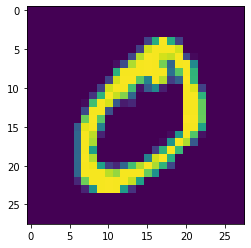

In [28]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1,:,:])

In [31]:
y_train[1]

0

In [32]:
X_train, X_test = X_train/255.0, X_test/255.0

In [33]:
sample_digit = X_train[0]
sample_digit_label = y_train[0]


Vamos a crear una instancia de modelo y entrenarla.

Elegimos `sparse_categorical_crossentropy` como la función de pérdida para el modelo. La salida del modelo tiene EL tamaño de `[batch_size, 10]` . El target del modelo es un vector entero, cada uno de los enteros está en el rango de 0 a 9.


In [34]:
model = build_model(allow_cudnn_kernel = True)


In [35]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = 'sgd', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=1)

938/938 [==============================] - 13s 14ms/step - loss: 0.9353 - accuracy: 0.7020 - val_loss: 0.5113 - val_accuracy: 0.8422


Ahora, comparemos con un modelo que no usa el kernel CuDNN:

In [37]:
#crear otro modelo que entrene con la cpu
model = build_model(allow_cudnn_kernel = False)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = 'sgd', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=1)

938/938 [==============================] - 13s 14ms/step - loss: 0.9743 - accuracy: 0.6861 - val_loss: 0.5446 - val_accuracy: 0.8293


Cuando se ejecuta en una máquina con una GPU NVIDIA y CuDNN instalados, el modelo creado con CuDNN es mucho más rápido de entrenar en comparación con el modelo que usa el núcleo TensorFlow normal.

El mismo modelo habilitado para CuDNN también se puede usar para ejecutar la inferencia en un entorno solo de CPU. Usando  `tf.device` forzamos a que se ejecute en cierto CPU. El modelo se ejecutará en la CPU de forma predeterminada si no hay una GPU disponible.


pip install tensorflow-gpu
pip install cuda
pip install cudnn